In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact
from matplotlib import pyplot as plt

### From the causalimpact tutorial

In [24]:
np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)
X = 100 + arma_process.generate_sample(nsample=100)
y = 1.2 * X + np.random.normal(size=100)
y[70:] += 1

In [25]:
np.mean(X)

100.02799264470924

In [26]:
np.mean(y)

120.2980081892465

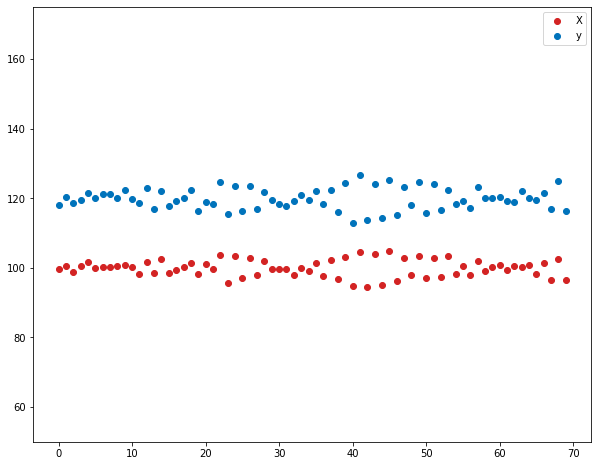

In [37]:
plt.figure(figsize=(10, 8))
plt.scatter(np.arange(70), X[:70], color='#d32323', label='X')
plt.scatter(np.arange(70), y[:70], color='#0073bb', label='y')
plt.ylim(50, 175)
plt.legend()

In [28]:
len(X)

100

In [29]:
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = [0, 69]
post_period = [70, 99]

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    121.23             3636.86
Prediction (s.d.)         120.39 (0.27)      3611.81 (8.04)
95% CI                    [119.88, 120.93]   [3596.28, 3627.8]

Absolute effect (s.d.)    0.84 (0.27)        25.06 (8.04)
95% CI                    [0.3, 1.35]        [9.06, 40.58]

Relative effect (s.d.)    0.69% (0.22%)      0.69% (0.22%)
95% CI                    [0.25%, 1.12%]     [0.25%, 1.12%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.8%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 121.23. By contrast, in the absence of an
intervention, we would have expected an average response of 120.39.
The 95% interval of this counterfactual prediction is [119.88, 120.93].
Subtracting this prediction from the ob

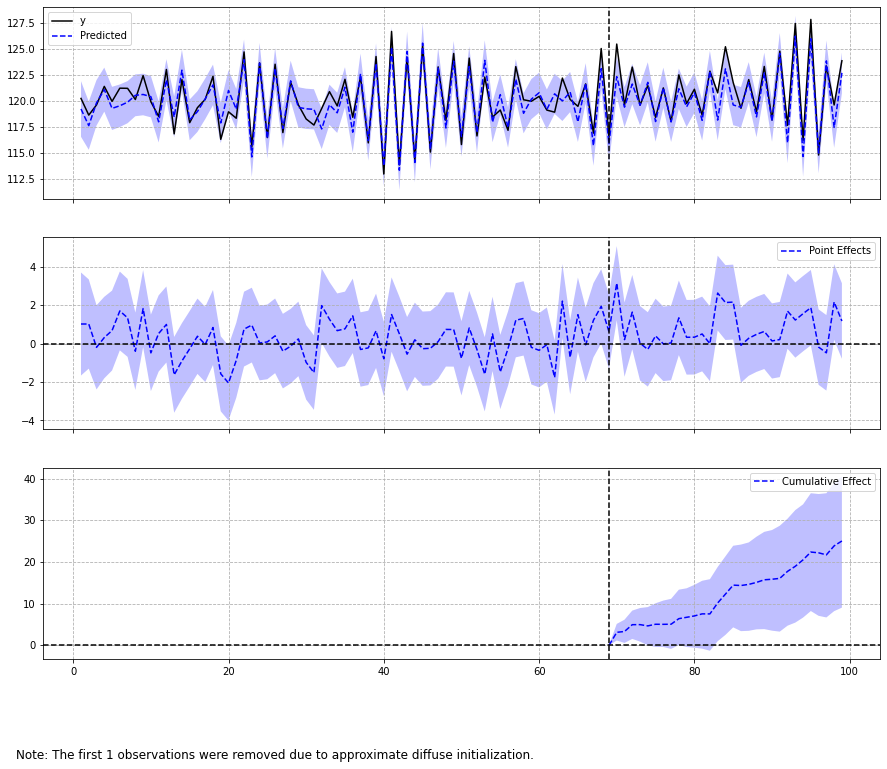

In [30]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()